In [1]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [2]:
#Path to automate our browser.
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the mars nasa news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
mars_temperature_df = df[0]
mars_temperature_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [58]:
mars_temperature_df['sol'].nunique

<bound method IndexOpsMixin.nunique of 0         10
1         11
2         12
3         13
4         14
        ... 
1862    1973
1863    1974
1864    1975
1865    1976
1866    1977
Name: sol, Length: 1867, dtype: int64>

In [6]:
mars_temperature_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
mars_temperature_df = mars_temperature_df.astype({"min_temp":'int'}) 
mars_temperature_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp              int64
pressure            float64
dtype: object

In [8]:
mars_temperature_df.to_csv('mars_temperature.csv', index=False)

In [9]:
month_temp_df = mars_temperature_df.loc[:, 'month': 'min_temp']
month_temp_df

,month,min_temp
0,6,-75
1,6,-76
2,6,-76
3,6,-74
4,6,-74
...,...,...
1862,5,-78
1863,5,-77
1864,5,-76
1865,5,-77


In [10]:
#Find average minimum temperature per month
avg_min_temp_by_month_df = month_temp_df.groupby(['month']).mean()
avg_min_temp_by_month_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


In [11]:
#Convert dataframe to list
avg_min_temp = avg_min_temp_by_month_df['min_temp'].values.tolist()
avg_min_temp

[-77.16091954022988,
 -79.93258426966293,
 -83.30729166666667,
 -82.74742268041237,
 -79.30872483221476,
 -75.29931972789116,
 -72.28169014084507,
 -68.38297872340425,
 -69.17164179104478,
 -71.98214285714286,
 -71.98550724637681,
 -74.45180722891567]

In [12]:
import matplotlib.pyplot as plt
import numpy as np

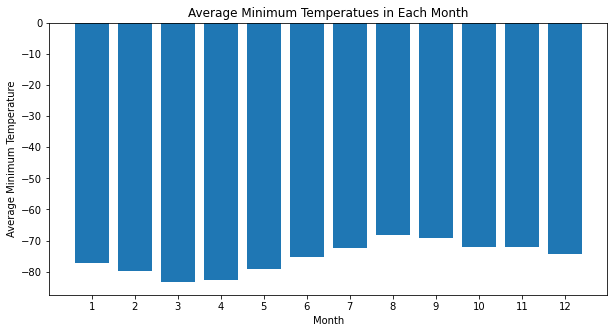

In [15]:
#Plot bar chart
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.figure(figsize = (10, 5))
plt.bar(month, avg_min_temp)
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature")
plt.xticks(month)
plt.title("Average Minimum Temperatues in Each Month")
plt.show()

In [43]:
#Extract month and pressure columns
month_pressure_df = mars_temperature_df.iloc[:,[4,6]]
month_pressure_df

,month,pressure
0,6,739.0
1,6,740.0
2,6,741.0
3,6,732.0
4,6,740.0
...,...,...
1862,5,730.0
1863,5,729.0
1864,5,729.0
1865,5,728.0


In [45]:
#Find the average pressure for each month
avg_pressure_by_month_df = month_pressure_df.groupby(['month']).mean()
avg_pressure_by_month_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [48]:
avg_pressure = avg_pressure_by_month_df['pressure'].values.tolist()
avg_pressure

[862.4885057471264,
 889.4550561797753,
 877.3229166666666,
 806.3298969072165,
 748.5570469798657,
 745.0544217687075,
 795.1056338028169,
 873.8297872340426,
 913.3059701492538,
 887.3125,
 857.0144927536232,
 842.156626506024]

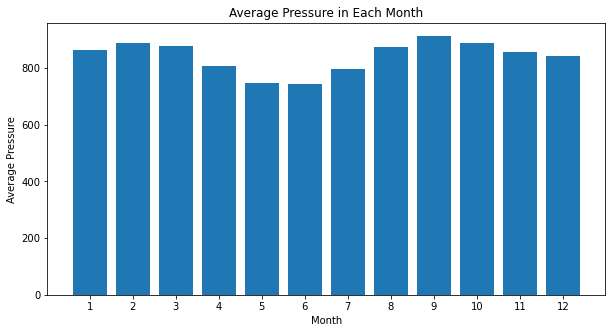

In [50]:
#plot bar chart
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.figure(figsize = (10, 5))
plt.bar(month, avg_pressure)
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.xticks(month)
plt.title("Average Pressure in Each Month")
plt.show()

<AxesSubplot:>

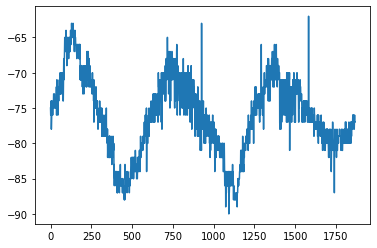

In [67]:
mars_temperature_df['min_temp'].plot()